In [1]:
import pandas as pd
import numpy as np
import pickle

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt

In [132]:
data = pd.read_pickle('book.pkl')
data.head(3)

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w
0,자기만의 방,"버지니아 울프 (지은이), 최설희 (옮긴이)",2022-03-10,,9791190710343,51373,국내도서>에세이>외국에세이,0,False,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,0,0
1,오만과 편견,"제인 오스틴 (지은이), 이신 (옮긴이)",2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,국내도서>소설/시/희곡>영미소설,0,False,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...","<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,0,0
2,프랑켄슈타인,"메리 셸리 (지은이), 김나연 (옮긴이)",2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,국내도서>소설/시/희곡>영미소설,0,False,0,"영국 「옵저버」, 미국 「뉴스위크」가 ‘역대 최고의 소설 100’에 선정한 명저이자...",,,0,0,0


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70206 entries, 0 to 71638
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         70206 non-null  object
 1   author        70206 non-null  object
 2   pubDate       70206 non-null  object
 3   description   70206 non-null  object
 4   isbn13        70206 non-null  object
 5   categoryID    70206 non-null  int64 
 6   categoryName  70206 non-null  object
 7   salesPoint    70206 non-null  int64 
 8   adult         70206 non-null  bool  
 9   rank          70206 non-null  int64 
 10  fullDes       70206 non-null  object
 11  fullDes2      70206 non-null  object
 12  story         70206 non-null  object
 13  reviewrank    70206 non-null  int64 
 14  reviewtitle   70206 non-null  object
 15  review_w      70206 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 8.6+ MB


In [2]:
from eunjeon import Mecab

In [3]:
#from konlpy.tag import Mecab
mecab = Mecab()

In [134]:
df = data.copy()

In [135]:
# 작가 이름
authors = []
for author in df['author']:
    a = author.split('(')[0]
    authors.append(a)

In [136]:
df['author'] = authors

In [137]:
# categoryName
catagories = []
for category in df['categoryName']:
    try:
        b = category.split('>')[1]
    except:
        b = category.split('>')[0]
    catagories.append(b)

In [138]:
df['categoryName'] = catagories

In [139]:
# 카테고리 추출(cat)
cat = ['소설/시/희곡', '에세이', '자기계발']

df = df[df['categoryName'].isin(cat)]
df

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w
0,자기만의 방,버지니아 울프,2022-03-10,,9791190710343,51373,에세이,0,False,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,0,0
1,오만과 편견,제인 오스틴,2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,소설/시/희곡,0,False,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...","<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,0,0
2,프랑켄슈타인,메리 셸리,2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,소설/시/희곡,0,False,0,"영국 「옵저버」, 미국 「뉴스위크」가 ‘역대 최고의 소설 100’에 선정한 명저이자...",,,0,0,0
17,[큰글씨책] 원서발췌 신선전,갈홍,2022-03-28,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...,9791128858338,50923,소설/시/희곡,0,False,0,동진의 갈홍이 지은 <신선전>. 신선의 행적과 장생불사를 다룬 신선설화집이자 신선전...,,,0,0,0
19,집착,아니 에르노,2022-03-18,사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,9788954685603,50921,소설/시/희곡,0,False,0,‘직접 체험하지 않은 허구를 쓴 적은 한 번도 없고 앞으로도 그럴 것’이라는 선언으...,,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71633,뇌력혁명 - 뇌피로가 풀려야 인생이 풀린다!,이시형,2013-11-01,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,9791185020136,70239,자기계발,281,False,9,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,<b>활력 잃고 방황하는 한국인에게 건네는 이시형 박사의 인생 처방전!</b><BR...,,2,[마이리뷰]기대도 안했지만,mcatcher
71634,남자의 교과서 - 여자는 전혀 모르고 남자는 차마 말 못하는 것들,명로진,2013-04-05,"20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력...",9788997838127,3812,자기계발,281,False,9,남자들은 언제나 갑의 눈치를 보며 끊임없는 술자리에 위장을 버리면서도 ‘일’이 가장...,<b>남자들은 지금 최선을 다하고 있다!<BR>\n상사와 갑을 위해 웃음을 다 써버...,,8,[마이리뷰]남자의 교과서,남희돌이
71636,그리스 신전에서 인간의 길을 묻다 - 내 인생을 바꾸는 4천 년의 지혜,스티븐 버트먼,2011-12-19,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,9788956591858,70216,자기계발,281,False,8,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,"매장된 도시와 버려진 사원의 잔해, 부서져가는 필사본에 담긴 채 4천 년의 세월을 ...",,8,[100자평]자신의 미숙함을 고민하는 청소년 혹은 20대 청년에게 ...,bright
71637,성공을 부르는 긍정의 힘,사토 도미오,2006-05-25,,9788987794938,70216,자기계발,281,False,7,,,,4,"[100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...",Friday


In [140]:
for i in range(len(df)):
    try:
        if (df['fullDes'][i] == '') & (df['fullDes2'][i] == ''):
            df = df.drop(index = i)
    except:
        pass

In [141]:
df['reviewtitle'].replace(0,'', inplace=True)
df['text'] = df['description'] + df['fullDes'] + df['fullDes2'] + df['reviewtitle']

In [142]:
df['text'] 

0        시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...
1        앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...
2        인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...
17       신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...
19       사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...
                               ...                        
71633    대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...
71634    20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력...
71636    그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...
71637             [100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...
71638    '칭찬'과 '비난', '낙관'과 '비관'을 주제로, 우리가 관계 맺고 있는 수많은 ...
Name: text, Length: 54976, dtype: object

In [144]:
#df.to_pickle('book1.pkl', protocol=4)

In [145]:
df1 = df.copy()
df1.columns

Index(['title', 'author', 'pubDate', 'description', 'isbn13', 'categoryID',
       'categoryName', 'salesPoint', 'adult', 'rank', 'fullDes', 'fullDes2',
       'story', 'reviewrank', 'reviewtitle', 'review_w', 'text'],
      dtype='object')

# 1. 전처리
## 1. 토큰화
- 형태소 기반 토큰화 -> mecab

- 1번째 text 

In [4]:
df1 = pd.read_pickle('book1.pkl')

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
df1['text'] = df1['text'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')

<ipython-input-6-8e3be58aaacb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['text'] = df1['text'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')


In [7]:
results = []

for i in df1['text']:
    fullDes = mecab.pos(i)
    words_all = []
    for j in fullDes:
        
        if (j[1] == 'NNG') | (j[1] == 'NNP'):
            words_all.append(j[0])
    results.append(words_all)

In [68]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

C:\Users\khb16\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [69]:
galaxy_word2vec = Word2Vec(results, min_count=1)

In [146]:
# - 시대, 역사, 시리즈, 로맨스, 전쟁,  미스터리,
# - 예술,  판타지, 자서전, 동화, 과학, 무협
# - 고민, 열정
key_list = ['시대', '역사', '시리즈', '로맨스', '전쟁',  '미스터리', '예술',  '판타지', '자서전', '동화', '과학', '무협', '고민', '열정']
key_list[0]

'시대'

In [159]:
for key in key_list:
    keyword = galaxy_word2vec.wv.most_similar(key,topn=30)
    for i in range(len(keyword)):
        {}_list.format(key).append(keyword[i][0])

AttributeError: 'str' object has no attribute 'append'

In [160]:
key = '시대'
{}_list.format(key)

SyntaxError: invalid syntax (<ipython-input-160-6b10996dc50c>, line 2)

In [154]:
소설 = galaxy_word2vec.wv.most_similar("소설",topn=30)
소설

[('작품', 0.6670917868614197),
 ('작가', 0.6411841511726379),
 ('서사', 0.5809723138809204),
 ('이야기', 0.5753629803657532),
 ('소설가', 0.5261902213096619),
 ('단편', 0.5188232064247131),
 ('전작', 0.5032219290733337),
 ('책', 0.47795891761779785),
 ('픽션', 0.46475011110305786),
 ('문학', 0.4445558786392212),
 ('단편집', 0.4387146234512329),
 ('판타지', 0.4385390281677246),
 ('문체', 0.4374757409095764),
 ('에세이', 0.43244850635528564),
 ('주목', 0.4323607087135315),
 ('스릴러', 0.4279372990131378),
 ('엔야', 0.42640233039855957),
 ('플롯', 0.42570966482162476),
 ('소설사', 0.4250619411468506),
 ('소재', 0.4237898588180542),
 ('스토리', 0.41605329513549805),
 ('독자', 0.4156467914581299),
 ('허구', 0.41284194588661194),
 ('동화', 0.4058852195739746),
 ('논픽션', 0.40483471751213074),
 ('중편', 0.40225332975387573),
 ('서술', 0.4014294743537903),
 ('장르', 0.4013984501361847),
 ('스토리텔링', 0.40134164690971375),
 ('흥미', 0.4003264009952545)]

In [118]:
results[1] # 오만과 편견 -> 키워드 소설이 있음.

['앤',
 '서재',
 '여성',
 '작가',
 '클래식',
 '지금',
 '전',
 '여자',
 '글',
 '혼자',
 '여행',
 '연애결혼',
 '시대',
 '제인',
 '오스틴',
 '감각',
 '자신',
 '언어',
 '여성',
 '사랑',
 '결혼',
 '앞',
 '현실',
 '난관',
 '앤',
 '서재',
 '여성',
 '작가',
 '클래식',
 '지금',
 '전',
 '여자',
 '글',
 '혼자',
 '여행',
 '연애결혼',
 '시대',
 '제인',
 '오스틴',
 '감각',
 '자신',
 '언어',
 '여성',
 '사랑',
 '결혼',
 '앞',
 '현실',
 '난관',
 '오만',
 '편견',
 '오해',
 '우여곡절',
 '끝',
 '사랑',
 '성취',
 '이야기',
 '제인',
 '오스틴',
 '결혼',
 '상대',
 '저울질',
 '남녀',
 '심리',
 '인물',
 '애정',
 '결혼',
 '조건',
 '당시',
 '여성',
 '감당',
 '부당',
 '처우',
 '오만',
 '편견',
 '속',
 '인물',
 '난관',
 '세월',
 '세기',
 '현실',
 '적용',
 '삶',
 '인간',
 '본성',
 '보편',
 '감성',
 '인물',
 '안',
 '숨',
 '책',
 '소설',
 '속',
 '인물',
 '자신',
 '모습',
 '투영',
 '책',
 '남녀',
 '사이',
 '애정',
 '심리',
 '묘사',
 '소설',
 '속',
 '인물',
 '인간',
 '본성',
 '탐구',
 '독자',
 '스스로',
 '제인',
 '오스틴',
 '이야기',
 '심취',
 '공간',
 '시대',
 '인간',
 '관계',
 '속',
 '사회',
 '속',
 '가치',
 '가치',
 '사이',
 '갈등',
 '고민',
 '제인',
 '오스틴',
 '오만',
 '편견',
 '시간',
 '빛',
 '까닭',
 '세계인',
 '마음',
 '이유',
 '여성',
 '삶',
 '사랑',
 '결혼',
 '통찰',
 '분석',
 '전',
 '세

In [142]:
for i in range(len(word_count_list)): #오만과 편견
    if word_count_list[i][0] in 소설_list:
        

In [145]:
word_count_list[0][0]

['고전',
 '권리',
 '당부',
 '대학',
 '독자',
 '마음',
 '문학가',
 '버지니아',
 '사람',
 '서재',
 '셰익스피어',
 '시대',
 '여성',
 '영감',
 '울프',
 '의식',
 '이야기',
 '자신',
 '자유',
 '작가',
 '작품',
 '창조',
 '추천',
 '클래식',
 '페미니즘']

In [77]:
galaxy_vocab = galaxy_word2vec.wv.vocab
galaxy_similarity = galaxy_word2vec[galaxy_vocab]

<ipython-input-77-b2293eb0e596>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  galaxy_similarity = galaxy_word2vec[galaxy_vocab]


In [78]:
galaxy_vocab

{'시대': <gensim.models.keyedvectors.Vocab at 0x17ee177dac0>,
 '페미니즘': <gensim.models.keyedvectors.Vocab at 0x17ee3d55730>,
 '비평': <gensim.models.keyedvectors.Vocab at 0x17ee3d55bb0>,
 '장': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1220>,
 '고전': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1280>,
 '거': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1250>,
 '대학': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1310>,
 '뉴': <gensim.models.keyedvectors.Vocab at 0x17e7d0f13a0>,
 '진행': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1430>,
 '강연': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1490>,
 '기반': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1520>,
 '에세이': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1580>,
 '버지니아': <gensim.models.keyedvectors.Vocab at 0x17e7d0f15e0>,
 '울프': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1640>,
 '여성': <gensim.models.keyedvectors.Vocab at 0x17e7d0f16a0>,
 '문학가': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1700>,
 '작품': <gensim.models.keyedvectors.Vo

In [79]:
galaxy_similarity

array([[-0.2076648 , -0.81055397, -1.2754434 , ..., -0.11226512,
         1.2148596 , -1.2893062 ],
       [ 2.8696034 , -0.9261729 ,  1.7669058 , ..., -1.0243922 ,
         0.5523248 , -4.9241896 ],
       [ 0.3202962 , -1.4180287 ,  0.94459003, ...,  0.01329903,
         2.5599034 , -2.7838557 ],
       ...,
       [-0.02552448, -0.03650407,  0.02758245, ...,  0.00791255,
        -0.00896169,  0.04526024],
       [-0.02596634, -0.0097083 ,  0.02156658, ..., -0.00816326,
        -0.02420022, -0.01052426],
       [-0.01013329,  0.03063118,  0.02316623, ..., -0.12476347,
         0.02178516, -0.08446348]], dtype=float32)

In [80]:
galaxy_tsne = TSNE(n_components=2)
galaxy_tsne

TSNE()

In [81]:
galaxy_transform_similarity = galaxy_tsne.fit_transform(galaxy_similarity)
galaxy_df = pd.DataFrame(galaxy_transform_similarity, index=galaxy_vocab, columns=['x', 'y'])
galaxy_df.head()

,x,y
시대,-18.315664,-9.188702
페미니즘,-24.283953,-13.157408
비평,-18.553408,3.650784
장,-18.913124,-5.465577
고전,-17.294912,-6.284657


비계층적 군집분석 

C:\Users\khb16\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\khb16\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


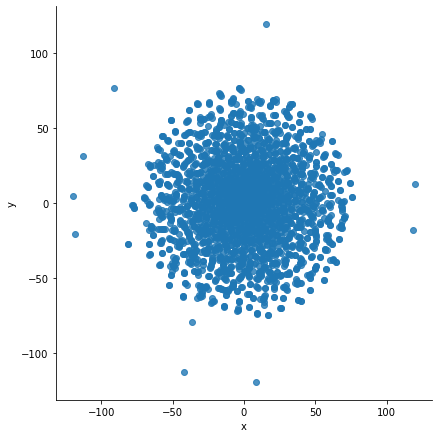

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans     
from sklearn.cluster import AgglomerativeClustering
sns.lmplot('x', 'y', data=galaxy_df, fit_reg=False, size=6)
plt.show()

In [28]:
# K-MEANS 
galaxy_kmeans = KMeans(n_clusters=3)
galaxy_predict = galaxy_kmeans.fit_predict(galaxy_df)
galaxy_predict

array([0, 0, 1, ..., 2, 0, 1])

In [29]:
galaxy_results = galaxy_df
galaxy_results["predict"] = galaxy_predict
galaxy_results[0:10]

,x,y,predict
초등학생,54.407070,4.627845,0
스마트폰,15.224374,2.875862,0
관리,-36.435493,-15.366958,1
앱,2.035129,17.807804,0
걱정,-36.177525,-25.829037,1
제,-90.871735,76.788811,1
최근,1.222165,3.965446,0
고민,-7.379066,-52.894047,2
부분,-66.500328,-17.890242,1
아이,37.390381,-42.491661,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


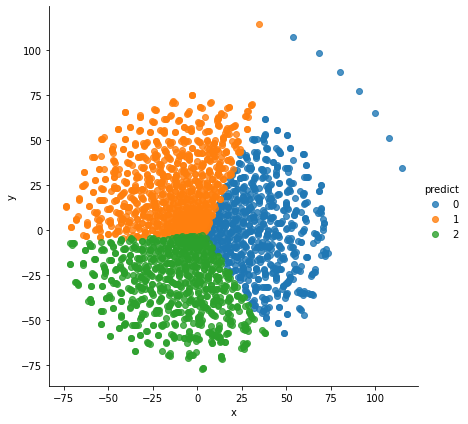

In [53]:
sns.lmplot('x', 'y', data=galaxy_results, fit_reg=False, size=6, hue="predict")
plt.show()

In [ ]:
for i in df1['text']:
     if i == '':
            print(i)

In [34]:
# 1번째 text : df['fullDes']
# 명사만 추출

cv_list = []
tdm_list = []
words_list = []
count_mat_list = []
count_list = []
#def get_noun(words_all):
#    return n for n in words_all
        

for i in range(len(results)):
    cv = TfidfVectorizer(max_features=25) # feature 개수 100개로 임의 설정
    #cv_list.append([cv])
    try: # text가 없는 경우가 있어서
        tdm = cv.fit_transform(results[i])
        #tdm_list.append([tdm])
        words = cv.get_feature_names()
        words_list.append([words])
        count_mat = tdm.sum(axis=0) #  단어별로 count 매김
        #count_mat_list.append([count_mat])
        count = numpy.squeeze(numpy.asarray(count_mat)) # squeeze : 차원을 하나 줄임 (2차원 >> 1차원)
        count_list.append([count])
    except:
        tdm = ''
        #tdm_list.append([tdm])
        words = ''
        words_list.append([words])
        count_mat = ''
        #count_mat_list.append([count_mat])
        count = ''
        count_list.append([count])

In [141]:
for i in range(len(word_count_list)):
    word_count_list[i] = word_count_list[i][0] 

In [168]:
print(tdm)

  (0, 8)	1.0
  (5, 17)	1.0
  (6, 3)	1.0
  (8, 7)	1.0
  (9, 9)	1.0
  (10, 10)	1.0
  (11, 14)	1.0
  (12, 15)	1.0
  (16, 8)	1.0
  (21, 17)	1.0
  (22, 3)	1.0
  (24, 7)	1.0
  (25, 9)	1.0
  (26, 10)	1.0
  (27, 14)	1.0
  (28, 15)	1.0
  (32, 19)	1.0
  (33, 9)	1.0
  (34, 15)	1.0
  (36, 18)	1.0
  (38, 6)	1.0
  (41, 1)	1.0
  (44, 4)	1.0
  (45, 0)	1.0
  (49, 2)	1.0
  :	:
  (216, 13)	1.0
  (219, 13)	1.0
  (231, 14)	1.0
  (233, 13)	1.0
  (237, 12)	1.0
  (241, 12)	1.0
  (244, 6)	1.0
  (248, 1)	1.0
  (250, 1)	1.0
  (263, 1)	1.0
  (289, 1)	1.0
  (301, 4)	1.0
  (302, 0)	1.0
  (307, 2)	1.0
  (309, 15)	1.0
  (311, 15)	1.0
  (314, 2)	1.0
  (315, 9)	1.0
  (316, 7)	1.0
  (327, 0)	1.0
  (338, 19)	1.0
  (339, 9)	1.0
  (340, 3)	1.0
  (342, 5)	1.0
  (345, 16)	1.0


In [180]:
print(tdm_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [188]:
cv_list[0]

[TfidfVectorizer(max_features=20)]

In [197]:
words = cv.get_feature_names()  # word 추출 (20개)
print(words)

['관계', '낙관', '내면', '분석', '비관', '비난', '사람', '사회', '설명', '유형', '인간', '인간상', '존재', '주제', '철저', '칭찬', '칼날', '통찰', '특징', '한계']


In [182]:
count_mat = tdm.sum(axis=0) #  단어별로 count 매김
count_mat

matrix([[2., 2., 2., 3., 4., 2., 7., 2., 2., 5., 1., 2., 2., 2., 1., 2.,
         1., 2., 1., 2.]])

In [10]:
import numpy
import operator

In [116]:
count = numpy.squeeze(numpy.asarray(count_mat)) # squeeze : 차원을 하나 줄임 (2차원 >> 1차원)
count

array([2., 2., 2., 2., 7., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 2.,
       2., 1., 1.])

In [62]:
word_count_list = []
for word, count in zip(words_list, count_list):
    word_count = list(zip(word, count))
    word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)
    word_count_list.append(word_count)

In [37]:
len(df1), len(word_count_list)

(54976, 54976)

In [ ]:
# 자유, 권리, 용기, 행복, 삶, 시대, 재미, 세계, 사랑, 결혼, 일상, 
# 철학, 괴물, 음악, 위로, 인생, 가족, 걱정, 치유, 기쁨, 운명, 세계, 성공, 실패, 도움, 명상, 스트레스, 고통, 인간
# 드라마, 영화, 수필, 소설, 기록, 시인, 동화, 죽음, 생각, 에세이, 두려움, 자유, 생존, 음식, 친구, 공부, 마음, 비관

In [66]:
words_list[0]

[[['고전',
   '권리',
   '당부',
   '대학',
   '독자',
   '마음',
   '문학가',
   '버지니아',
   '사람',
   '서재',
   '셰익스피어',
   '시대',
   '여성',
   '영감',
   '울프',
   '의식',
   '이야기',
   '자신',
   '자유',
   '작가',
   '작품',
   '창조',
   '추천',
   '클래식',
   '페미니즘']],
 [['가치',
   '결혼',
   '고전',
   '난관',
   '독자',
   '사랑',
   '사이',
   '서재',
   '세계인',
   '소설',
   '시대',
   '심리',
   '언어',
   '여성',
   '오만',
   '오스틴',
   '이야기',
   '인간',
   '인물',
   '자신',
   '작가',
   '제인',
   '클래식',
   '편견',
   '현실']],
 [['과정',
   '과학',
   '괴물',
   '구성',
   '궁극',
   '묘사',
   '미국',
   '생명체',
   '소설',
   '실험',
   '심리',
   '연구',
   '열망',
   '오만',
   '이야기',
   '인간',
   '인류',
   '인물',
   '작가',
   '작품',
   '장르',
   '창조',
   '최고',
   '탄생',
   '프랑켄슈타인']],
 [['거삼',
   '경전',
   '곡법',
   '과학',
   '도교',
   '문학',
   '민간',
   '방법',
   '방중술',
   '복약',
   '성선',
   '신선',
   '신선설',
   '신앙',
   '영향',
   '인법',
   '자연',
   '장생불사',
   '전기',
   '전수',
   '전통',
   '중국',
   '철학',
   '행기',
   '행적']],
 [['가공',
   '감각',
   '감정',
   '감행',
   '개인',
   '개정판',
   '관계',
   '

In [63]:
word_count_list

[[(['고전',
    '권리',
    '당부',
    '대학',
    '독자',
    '마음',
    '문학가',
    '버지니아',
    '사람',
    '서재',
    '셰익스피어',
    '시대',
    '여성',
    '영감',
    '울프',
    '의식',
    '이야기',
    '자신',
    '자유',
    '작가',
    '작품',
    '창조',
    '추천',
    '클래식',
    '페미니즘'],
   array([ 4.,  4.,  4.,  4.,  4.,  6.,  5.,  5.,  4.,  4.,  3.,  8., 29.,
           5.,  5.,  3.,  6., 10.,  6.,  6.,  7.,  8.,  5.,  4.,  3.]))],
 [(['가치',
    '결혼',
    '고전',
    '난관',
    '독자',
    '사랑',
    '사이',
    '서재',
    '세계인',
    '소설',
    '시대',
    '심리',
    '언어',
    '여성',
    '오만',
    '오스틴',
    '이야기',
    '인간',
    '인물',
    '자신',
    '작가',
    '제인',
    '클래식',
    '편견',
    '현실'],
   array([ 4., 10.,  6.,  5.,  5., 10.,  4.,  5.,  4.,  4., 11.,  6.,  5.,
          16.,  9., 11.,  4.,  9., 10.,  6.,  5., 11.,  5.,  9.,  5.]))],
 [(['과정',
    '과학',
    '괴물',
    '구성',
    '궁극',
    '묘사',
    '미국',
    '생명체',
    '소설',
    '실험',
    '심리',
    '연구',
    '열망',
    '오만',
    '이야기',
    '인간',
    '인류',
    '인물',
    

In [215]:
pd.DataFrame(word_count_list[0][0][0],word_count_list[0][0][1])

,0
4.0,고전
4.0,당부
4.0,대학
4.0,독자
6.0,마음
5.0,문학가
5.0,버지니아
4.0,사람
4.0,서재
8.0,시대


In [227]:
word_count = list(zip(words, count))
word_count

[('관계',
  array([2., 2., 2., 3., 4., 2., 7., 2., 2., 5., 1., 2., 2., 2., 1., 2., 1.,
         2., 1., 2.]))]

In [224]:
word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True) # 상위  count 순으로 정렬 
word_count

[(['관계',
   '낙관',
   '내면',
   '분석',
   '비관',
   '비난',
   '사람',
   '사회',
   '설명',
   '유형',
   '인간',
   '인간상',
   '존재',
   '주제',
   '철저',
   '칭찬',
   '칼날',
   '통찰',
   '특징',
   '한계'],
  array([2., 2., 2., 3., 4., 2., 7., 2., 2., 5., 1., 2., 2., 2., 1., 2., 1.,
         2., 1., 2.]))]

In [15]:
hot_key = list(dict(word_count[0][:20]).keys())
hot_key

ValueError: dictionary update sequence element #0 has length 20; 2 is required

In [30]:
pd.DataFrame(words_list)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,고전,권리,당부,대학,독자,마음,문학가,버지니아,사람,서재,...,의식,이야기,자신,자유,작가,작품,창조,추천,클래식,페미니즘
1,가치,결혼,고전,난관,독자,사랑,사이,서재,세계인,소설,...,오스틴,이야기,인간,인물,자신,작가,제인,클래식,편견,현실
2,과정,과학,괴물,구성,궁극,묘사,미국,생명체,소설,실험,...,인간,인류,인물,작가,작품,장르,창조,최고,탄생,프랑켄슈타인
3,거삼,경전,곡법,과학,도교,문학,민간,방법,방중술,복약,...,인법,자연,장생불사,전기,전수,전통,중국,철학,행기,행적
4,가공,감각,감정,감행,개인,개정판,관계,관찰,단장,대표작,...,역사,은유,자신,작가,작품,질투,집착,카사노바,탐닉,표지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54971,과학,과학자,관리,뇌력,대한민국,박사,방법,사장,사회,샐러리맨,...,자각,정신,최고,피로,하루,한국인,해법,혁명,활력,효율
54972,강의,교과서,글쓰기,남자,남편,눈물,단어,대부분,대화,명로진,...,아버지,아빠,아이,여자,이야기,자신,저자,정의,중요,친구
54973,가능,고대,고전,그리스,기둥,도전,문명,분석,성취,세기,...,이야기,인간,인생,저자,적용,지금,지혜,창조,탄생,현대인
54974,달성,말의,목적,승리,유전자,자동,자평,장치,None,None,...,None,None,None,None,None,None,None,None,None,None


In [39]:
Keyword = pd.DataFrame(words_list)
Keyword

,0
0,"[고전, 권리, 당부, 대학, 독자, 마음, 문학가, 버지니아, 사람, 서재, 셰익..."
1,"[가치, 결혼, 고전, 난관, 독자, 사랑, 사이, 서재, 세계인, 소설, 시대, ..."
2,"[과정, 과학, 괴물, 구성, 궁극, 묘사, 미국, 생명체, 소설, 실험, 심리, ..."
3,"[거삼, 경전, 곡법, 과학, 도교, 문학, 민간, 방법, 방중술, 복약, 성선, ..."
4,"[가공, 감각, 감정, 감행, 개인, 개정판, 관계, 관찰, 단장, 대표작, 독보,..."
...,...
54971,"[과학, 과학자, 관리, 뇌력, 대한민국, 박사, 방법, 사장, 사회, 샐러리맨, ..."
54972,"[강의, 교과서, 글쓰기, 남자, 남편, 눈물, 단어, 대부분, 대화, 명로진, 본..."
54973,"[가능, 고대, 고전, 그리스, 기둥, 도전, 문명, 분석, 성취, 세기, 신전, ..."
54974,"[달성, 말의, 목적, 승리, 유전자, 자동, 자평, 장치]"


In [44]:
Key_list = []

for i in Keyword[0]:
    Key_list.append(i)

In [56]:
Keyword.columns = ['Key']

In [58]:
Keyword['Key']

0        [고전, 권리, 당부, 대학, 독자, 마음, 문학가, 버지니아, 사람, 서재, 셰익...
1        [가치, 결혼, 고전, 난관, 독자, 사랑, 사이, 서재, 세계인, 소설, 시대, ...
2        [과정, 과학, 괴물, 구성, 궁극, 묘사, 미국, 생명체, 소설, 실험, 심리, ...
3        [거삼, 경전, 곡법, 과학, 도교, 문학, 민간, 방법, 방중술, 복약, 성선, ...
4        [가공, 감각, 감정, 감행, 개인, 개정판, 관계, 관찰, 단장, 대표작, 독보,...
                               ...                        
54971    [과학, 과학자, 관리, 뇌력, 대한민국, 박사, 방법, 사장, 사회, 샐러리맨, ...
54972    [강의, 교과서, 글쓰기, 남자, 남편, 눈물, 단어, 대부분, 대화, 명로진, 본...
54973    [가능, 고대, 고전, 그리스, 기둥, 도전, 문명, 분석, 성취, 세기, 신전, ...
54974                    [달성, 말의, 목적, 승리, 유전자, 자동, 자평, 장치]
54975    [관계, 낙관, 내면, 리뷰, 묘사, 분석, 비관, 비난, 사람, 사회, 설명, 성...
Name: Key, Length: 54976, dtype: object

# 2. EDA

In [263]:
# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57384 entries, 0 to 60437
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         57384 non-null  object
 1   author        57384 non-null  object
 2   pubDate       57384 non-null  object
 3   description   57384 non-null  object
 4   isbn13        57384 non-null  object
 5   categoryID    57384 non-null  int64 
 6   categoryName  57384 non-null  object
 7   salesPoint    57384 non-null  int64 
 8   adult         57384 non-null  bool  
 9   rank          57384 non-null  int64 
 10  fullDes       57384 non-null  object
 11  fullDes2      57384 non-null  object
 12  story         57384 non-null  object
 13  reviewrank    57384 non-null  int64 
 14  reviewtitle   57384 non-null  object
 15  review_w      57384 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 9.1+ MB


In [284]:
df.describe()

,categoryID,salesPoint,rank,reviewrank
count,2884.000000,2884.000000,2884.000000,2884.000000
mean,44152.025312,11306.330791,4.702843,4.712205
std,32930.604088,26902.368307,4.784366,4.808549
min,0.000000,0.000000,0.000000,0.000000
25%,34605.000000,0.000000,0.000000,0.000000
50%,50993.000000,1310.000000,0.000000,2.000000
75%,51413.000000,10467.500000,10.000000,10.000000
max,189515.000000,379054.000000,10.000000,10.000000


In [276]:
df.isnull().sum().sum()

0

In [281]:
df[df.duplicated() == True]

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w
964,먹는 것과 싸는 것,"가시라기 히로키 (지은이), 김영현 (옮긴이)",2022-03-25,궤양 성 대장염 으로 년 간 투병 한 저자 가 자신 의 체험 을 바탕 으로 인간 활...,9791191716092,51373,국내도서>에세이>외국에세이,0,False,0,궤양 성 대장염 으로 년 간 투병 한 저자 가 자신 의 체험 을 바탕 으로 인간 활...,어느 날 먹 는 것 과 싸 는 것 에 문제 가 생겼 습니다 나 는 계속 사회인 으로...,,0,,0


In [282]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

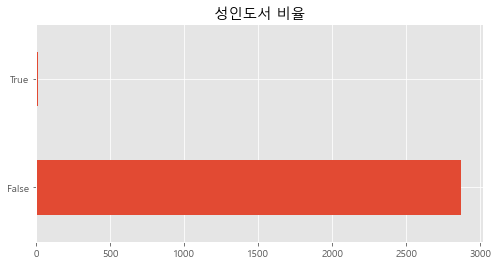

In [272]:
plt.style.use('ggplot')

df['adult'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('성인도서 비율')
plt.show()

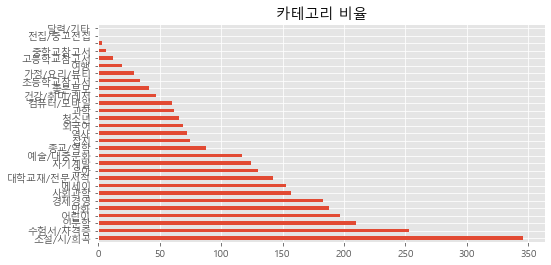

In [289]:
df1['categoryName'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('카테고리 비율')
plt.show()

In [288]:
df1['categoryName'].value_counts()

소설/시/희곡      346
수험서/자격증      253
인문학          210
어린이          197
만화           188
경제경영         183
사회과학         157
에세이          153
대학교재/전문서적    142
유아           130
자기계발         124
예술/대중문화      117
종교/역학         88
잡지            75
역사            72
외국어           69
청소년           66
과학            62
컴퓨터/모바일       60
건강/취미/레저      47
좋은부모          41
초등학교참고서       34
가정/요리/뷰티      29
여행            19
고등학교참고서       12
중학교참고서         6
               3
전집/중고전집        1
달력/기타          1
Name: categoryName, dtype: int64

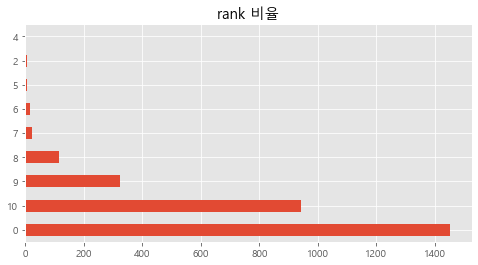

In [290]:
df1['rank'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('rank 비율')
plt.show()

# 3. 키워드 추출

In [303]:
results

'앤 서재 여성 작가 클래식 권 여자 글 쓰 혼자 여행 연애결혼 쉽 시대 제인 오스틴 그녀 예리 감각 언어 여성 사랑 결혼 마주 해야 현실 난관 치밀 그려냈'